# Kaggle link
https://www.kaggle.com/nyansoe/assignment-1
<br>
# Overview of the Algorithm
The algorithm: <br>
(1) First, cities are divided into two portions based on the first/originated city (y) coordinate.  So there will be a lower part and upper part. <br>
(2) Then, the cities are sorted out based on "wieght" between them and the first/originated city.  X,Y and angle from the originated city are included in calculation.  This is very raw sort.  Three dimensional Euclidean distance calculation is used.  Then two sorted parts are combined.<br> 
(3) The very raw sorted list is put into another function to find the best possible route by using permutation distance calculation between cities.  The calculation can calculate best possible route from along 6 cities (default/minimum) to 11 cities (maximum).  

## Importing Library

In [ ]:
import matplotlib.pyplot as plt
import math
import sys
import itertools

# set miximum recursion limit
sys.setrecursionlimit(21000)

The prime number calculation and merge sort are involved.  Hence, defualt recursion limit is overwrited.

## City class

In [ ]:
class City:
    """Represent a City object"""
    def __init__(self, city_id, x_coordinate, y_coordinate, prime):
        """Initialise a City instance."""
        self._city_id = city_id
        self._x = x_coordinate
        self._y = y_coordinate
        self._prime = prime
        
    def __lt__(self, other): 
        # For < operator comparison
        return self.get_weight() < other.get_weight() 
        
    def __le__(self, other): 
        # For <= operator comparison
        return self.get_weight() <= other.get_weight() 
    
    def __eq__(self, other): 
        # For == operator comparison
        return self.get_weight() == other.get_weight() 
        
    def __ne__(self, other): 
        # For != or <> operator comparison
        return self.get_weight() != other.get_weight() 
    
    def __gt__(self, other): 
        # For > operator comparison
        return self.get_weight() > other.get_weight()     
        
    def __ge__(self, other): 
        # For >= operator comparison
        return self.get_weight() >= other.get_weight() 
        
    def is_prime(self): 
        # Check if the city_id is prime
        return self._prime
        
    def get_x(self):
        return self._x
    
    def get_y(self):
        return self._y
    
    def get_city_id(self):
        return self._city_id
    
    def get_distance(self):
        return self._distance
    
    def get_angle(self):
        # Get the angle from the originated city
        return self._angle
    
    def get_weight(self):
        # Get euclidean distance base on calculation of x,y,angle
        # from the originated city
        return self._weight
    
    def set_distance(self, distance):
        self._distance = distance
        
    def set_angle(self, angle):
        # Set the angle from the originated city
        self._angle = angle
        
    def set_weight(self, weight):
        # Set euclidean distance base on calculation of x,y,angle
        # from the originated city
        self._weight = weight        

## Singly linked class

In [ ]:
class SinglyLinkedList:
    """Represent a SinglyLinkedList object"""
    class Node:
        """Represent a Node object"""
        # Constructor for Node
        def __init__(self, element, nxt):
            self._element = element
            self._next = nxt
    

    # Constructor for SinglyLinkedList    
    def __init__(self):
        # Constructor 
        # create empty head and tail here
        self._head = self.Node(None, None)
        self._tail = self.Node(None, None)
        self._current = self._head
        self._length = 0
    
    # move the current position to next position
    def __next__(self):
        # check validity
        if (self._current is not None) and (self._current._next is not None):
            self._current = self._current._next
            return self._current
        else:
            return None    
            
    def __len__(self):
        # get the size of the list  
        return self._length
    
    def __iter__(self):
        # Generate a forward iteration of the elements of the list.
        cursor = self._head
        while cursor is not None:
          yield cursor._element
          cursor = cursor._next
    
    def reset(self):
        # reset the current position to the start
        self._current = self._head
    
    def fetch_element(self):
        # retrieve the value at the current position
        if self._current is not None:
            return self._current._element
        else:
            return None
    
    def is_empty(self):
        # check if the list is empty
        return self._length == 0
    
    def append(self, element):
        # insert the list at the end of the list
        new_node = self.Node(element, None)
        if self.is_empty(): #i.e. first Node
            self._head = new_node
            self._tail = new_node
        else: #at least one element is already in the list
            self._tail._next = new_node 
            self._tail = new_node
        self._length += 1
        
    def index_element(self, index):
        # access the element by its position in the list
        if self.is_empty():
            raise Exception("The list is empty.")
        else:
            count = 0
            temp = self._head
            while (temp):
                if (count == index):
                    return temp._element # return element if found
                else:
                    temp = temp._next
                    count += 1
        return None

    def sortedMerge(self, a, b, ascending): 
        # Sort base on value of a and b
        result = None

        # Base cases 
        if a == None: 
            return b 
        if b == None: 
            return a 
        if ascending:
            # Sort in ascending order,
            # pick either a or b and recur.. 
            if a._element <= b._element:
                result = a 
                result._next = self.sortedMerge(a._next, b, ascending) 
            else: 
                result = b 
                result._next = self.sortedMerge(a, b._next, ascending)
        else:
            # Sort in descending order,
            # pick either a or b and recur.. 
            if a._element >= b._element:
                result = a 
                result._next = self.sortedMerge(a._next, b, ascending) 
            else: 
                result = b 
                result._next = self.sortedMerge(a, b._next, ascending)                
        return result 

    def mergeSort(self, h, ascending): 
        # Recursivly arrange on a tree and sort
        # Base case if head is None 
        if h == None or h._next == None: 
            return h 

        # get the middle of the list 
        middle = self.getMiddle(h) 
        nexttomiddle = middle._next

        # set the next of middle node to None 
        middle._next = None

        # Apply mergeSort on left list 
        left = self.mergeSort(h, ascending) 

        # Apply mergeSort on right list 
        right = self.mergeSort(nexttomiddle, ascending) 

        # Merge the left and right lists 
        sortedlist = self.sortedMerge(left, right, ascending) 
        return sortedlist 

    def getMiddle(self, head): 
        # Utility function to get the middle 
        # of the linked list 
        if (head == None): 
            return head 

        slow = head 
        fast = head 

        while (fast._next != None and
            fast._next._next != None): 
            slow = slow._next
            fast = fast._next._next

        return slow  

The singly linked list class has basic features and extra features which can be used in merge sort.

## Total distance

In [ ]:
def total_distance(list_of_route, start=0, end=None):
    """Calculate distance to next route city and set the value"""
    
    # check the validity of start variable
    if start >= len(list_of_route):
        start = len(list_of_route) # control out of bound value
        
    # check the validity of end variable
    if end == None:
        end = len(list_of_route) # set the default value
    elif end > len(list_of_route):
        end = len(list_of_route) # control out of bound value
        
    # calculate total distance along the route from start to end
    total_distance = 0
    for i in range(start, end): 
        current_city = list_of_route[i]  
        total_distance += current_city.get_distance() # accumulate distance
    return total_distance

#### Note
Analysis: The main component of the function is the for-loop which run from start (default:0) to end (default:length of arry/list).<br>
Therefore, it can be said that growth rate for this function: g(n) = n. <br>
Hence, O(n)

## Distance to next city

In [ ]:
def set_distance_route_list(list_of_route, connect_to_start=False, start=0, end=None):
    """Calculate distance to next route city and set the value based on list"""
    # connect_to_start variable set to true if the edge city needs to reconnect originated city
    # check the validity of start variable
    if start >= len(list_of_route):
        start = len(list_of_route) # control out of bound value
        
    # check the validity of end variable
    if end == None:
        end = len(list_of_route) # set the default value
    elif end > len(list_of_route):
        end = len(list_of_route) # control out of bound value
        
    # set distance in distance cities to current city
    for i in range(start, end): 
        current_city = list_of_route[i]  
        if (i+1) < end:
            destination_city = list_of_route[i+1]
        else:
            # reach at the edge city
            if connect_to_start == False:
                destination_city = list_of_route[i]  # Point to itself
            else:
                destination_city = list_of_route[0] # distance to the very first city
        distance_between_city = euclidean_distance(current_city, destination_city)
        
        # Every 10th city is 10% longer if it is not come from a city which has a prime city_id
        # but city_id start from 0, so every 10th step will be 9, 19, 29, etc.
        # in other word, if 9th step is a prime_id, the distance will be normal
        # otherwise it will be 10% longer, so 9th setp will be 8, 18, 28, etc.
        if (i+2)%10 == 0 and current_city.is_prime() == False:
            distance_between_city = distance_between_city * 1.1
        current_city.set_distance(distance_between_city)
        
def set_distance_route_tuple(list_of_route, offset = 0):
    """Calculate distance to next route city and set the value based on tuple"""
    # offset keep the value of the position of current city in sequential list.
    # Without offset value, it can not calculate whether every 9th city is a prime or not.
    start = 0
    end = len(list_of_route)
        
    # set distance in distance cities to current city
    for i in range(start, end): 
        current_city = list_of_route[i]  
        if (i+1) < end:
            destination_city = list_of_route[i+1]
        else:
            # reach at the edge city
                destination_city = list_of_route[i]  # Point to itself
        distance_between_city = euclidean_distance(current_city, destination_city)
        
        # Every 10th city is 10% longer if it is not come from a city which has a prime city_id
        # but city_id start from 0, so every 10th step will be 9, 19, 29, etc.
        # in other word, if 9th step is a prime_id, the distance will be normal
        # otherwise it will be 10% longer, so 9th setp will be 8, 18, 28, etc.
        # Since this calculation is called from permutation, it needs offset to calculate
        # the real position
        if (offset+i+2)%10 == 0 and current_city.is_prime() == False:
            distance_between_city = distance_between_city * 1.1
        current_city.set_distance(distance_between_city)

#### Note
The above two functions are used to set distance variables in the City object.<br>
set_distance_route_list function is specifically used to set distance variables for list, and <br>
set_distance_route_tuple function is created to use in permutation calculation. <br>
They both have a similar algorithm.  Moreover, they are both concerned whether every 9th city has prime city id or not.  

Analysis: The main component of the functions is the for-loop which iterates through the given list.
Therefore, it can be said that growth rate for this function: g(n) = n. 
Hence, O(n)

## Find the best possible route

In [ ]:
def find_route(combined_altitude, number_of_involved_cities=0):
    """Calculate best possible route using permutation"""
    #contorl/wrapper function of best_possible_route function    
    #number_of_involved_cities variable store number of cities involved in permutation calculation
    
    #check validity of number_of_involved_cities
    #obsolete code since greedy level idea was introduced
    #     if number_of_involved_cities < 6:
    #         print("Number of cities involved in calculation can not be less than 4\n")
    #         number_of_involved_cities = 6
    #     elif number_of_involved_cities > 10:
    #         print("Number of cities involved in calculation can not be greater than 12\n")
    #         number_of_involved_cities = 10
        
    number_of_involved_cities += 6 #minimum involved permutation cities is 6
    step_cities = number_of_involved_cities - 3 #set a number of cities to skip in the loop

    set_distance_route_list(combined_altitude, False)

    length_of_route = len(combined_altitude)
    for i in range(0, len(combined_altitude),step_cities):
        best_possible_route(combined_altitude, i, i+number_of_involved_cities)
        process_percentage = int((i/length_of_route)*100)
        print(">>> Possible best route calculation {:d}% complete".format(process_percentage), end='\r', flush=True)
    print(">>> Possible best route calculation {:d}% complete".format(100), end='\r', flush=True)
    print("\n");
    return combined_altitude


def best_possible_route(list_of_route, start=0, end=None):
    """Find best route between start and end city using permutation"""
    # check the validity of start variable
    if start >= len(list_of_route):
        start = len(list_of_route) # control out of bound value
        
    # check the validity of end variable
    if end == None:
        end = len(list_of_route) # set the default value
    elif end > len(list_of_route):
        end = len(list_of_route) # control out of bound value
    
    # exclude start and end city when copy
    cities_between = list_of_route[(start+1):(end-1)] 
    
    if len(cities_between) <= 1:
        return
    perm_city = itertools.permutations(cities_between) # generate number of permutation between two edge cities
    
    shortest_distance = -99
    shortest_route = [] # initialize the list

    for route_cities in perm_city:
        short_route_cities = [] # reset the list
        short_route_cities.append(list_of_route[start]) # add start city in the list
        for city in route_cities:
            short_route_cities.append(city) # add cities in the permutaion list
        short_route_cities.append(list_of_route[end-1]) # add end city in the list
        set_distance_route_tuple(short_route_cities, start)
        current = total_distance(short_route_cities)
        
        if shortest_distance < 0: # check if it is the first iteration
            shortest_distance = current
            shortest_route = short_route_cities[:]
        else:
            if current < shortest_distance:
                shortest_distance = current
                shortest_route = short_route_cities[:]
    
    # Overwrite a part of list_of_route list
    count = start
    for city in shortest_route:
        list_of_route[count] = city
        count += 1

#### Note
find_route function controls which cities are involved in permutation calculation that is undertaken by best_possible_route function.<br>

Analysis: The main component of the find_route functions is the for-loop which iterates through the give list.  However, it calls best_possible_route function in each loop.<br>
Although the find_route has steps in iteration, the growth rate is still g(n) = n.<br>
The best_possible_route function: approximate f(n) = n(n+n+n) + n = 3n<sup>2</sup> + n, g(n) = n<sup>2</sup>.<br>
The best_possible_route function is in the find_route function.  Therefore, g(n) = n(n<sup>2</sup>) = n<sup>3</sup>.<br>
Hence, O(n<sup>3</sup>) for finding the best route procedure.

## Recursive function

In [ ]:
def check_prime(n,i=2):
    """Check if given number is prime"""
    if(n<=2):
        if n == 2:
            return True
        else:
            return False
    if(n%i==0):
        return False
    if(i*i > n):
        return True
    return check_prime(n,i+1)

#### Note:
The recursive function's g(n) = sqrt(n) <br>
Hence, O(sqrt(n))

## Euclidean fuction

In [ ]:
def euclidean_distance(city1, city2):
    """Find euclidean distance between two cities"""
    distance_x = (float(city1.get_x()) - float(city2.get_x())) ** 2
    distance_y = (float(city1.get_y()) - float(city2.get_y())) ** 2
    distance = math.sqrt(distance_x + distance_y)
    return distance

def euclidean_weight(city1, city2):
    """Find three demension euclidean distance between two cities"""
    distance_x = (float(city1.get_x()) - float(city2.get_x())) ** 2
    distance_y = (float(city1.get_y()) - float(city2.get_y())) ** 2
    distance_angle = (float(city1.get_angle()) - float(city2.get_angle())) ** 2
    distance = math.sqrt(distance_x + distance_y + distance_angle)
    return distance

#### Note
Analysis: Both functions has the growth rate function g(n) = 1. <br>
Hence, O(1)

## Insertion sort

In [ ]:
def insertion_sort_ascending(list_to_sort, start=0, end=None):
    """Sort object into ascending order"""
    # check the validity of start variable
    if start >= len(list_to_sort):
        start = len(list_to_sort) # control out of bound value
        
    # check the validity of end variable
    if end == None:
        end = len(list_to_sort) # set the default value
    elif end > len(list_to_sort):
        end = len(list_to_sort) # control out of bound value
        
    for i in range(start+1, end): 
        current = list_to_sort[i]
        k = i
        # while k > start and list_to_sort[k-1].get_distance() > current.get_distance():
        while k > start and list_to_sort[k-1].get_weight() > current.get_weight():
        # while k > start and list_to_sort[k-1].get_x() > current.get_x():
            list_to_sort[k] = list_to_sort[k-1]
            k -= 1
        list_to_sort[k] = current # curent object is now in the right position    
    
        
def insertion_sort_descending(list_to_sort, start=0, end=None):
    """Sort object into descending order"""
    # check the validity of start variable
    if start >= len(list_to_sort):
        start = len(list_to_sort) # control out of bound value
        
    # check the validity of end variable
    if end == None:
        end = len(list_to_sort) # set the default value
    elif end > len(list_to_sort):
        end = len(list_to_sort) # control out of bound value
    for i in range(start+1, end): 
        current = list_to_sort[i]
        k = i
        # while k > start and list_to_sort[k-1].get_distance() < current.get_distance():
        while k > start and list_to_sort[k-1].get_weight() < current.get_weight():
        # while k > start and list_to_sort[k-1].get_x() < current.get_x():
            list_to_sort[k] = list_to_sort[k-1]
            k -= 1
        list_to_sort[k] = current # curent object is now in the right position

#### Note
In here, 3d (dimension) euclidean distance is used for sorting calculation because distance measuring using only X and Y can not get the whole picture.  For example,
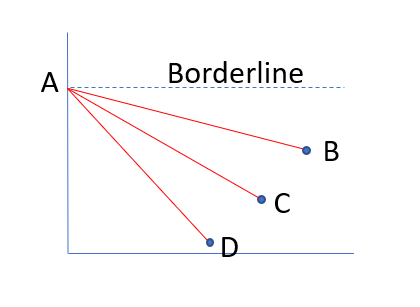
The above picture has 4 points(A, B, C, and D).  Let's assume that A is the originated city, and it has the same distance between points B, C, and D.  With 2d euclidean calculation, it will assume that they all have the same distance, and put in the sort position arbitrary.  Only using 3d euclidean calculation will put in order such as AD,AC, and AB.

Analysis: insertion_sort_ascending and insertion_sort_descending use insertion sort method. Their g(n) = n<sup>2</sup><br>
Hence, O(n<sup>2</sup>)


## Find angle

In [ ]:
def find_angle(city1, city2):
    """Find angle between two cities"""
    x1 = city1.get_x()
    y1 = city1.get_y()
    x2 = city2.get_x()
    y2 = city2.get_y()
    x = x2-x1
    y = y2-y1
    angle = math.atan2(y, x)
    angle = math.degrees(angle)
    return angle

#### Note
Analysis: find_angle function's g(n) = 1<br>
Hence, O(1)

## Save file

In [ ]:
def save_route_csv(routes, filename):
    """Save the path in the file"""
    filename = "/kaggle/working/"+filename # for kaggle only
    out_file = open(filename, 'w')
    out_file.write("Path\n")
    for city in routes:
        text = str(city.get_city_id()) + "\n"
        out_file.write(text)
    out_file.close()
    print("Path is save in {:s} file.".format(filename))    
    

#### Note
Analysis: save_route_csv function's g(n) = n<br>
Hence, O(n)

## Read cities.csv

In [ ]:
def load_cities(records_to_load):
    """Open the file and transform data into city objects"""
    in_file = open('../input/traveling-santa-2018-prime-paths/cities.csv', 'r')

    # use readlines() instead of readline() for better time complexity
    lines = in_file.readlines()
    line_count = 0
    cities = SinglyLinkedList() 
    lines_to_read = records_to_load 

    lines_to_read = lines_to_read + 1 # Increase 1 to exclude a header line

    prime_list = [i for i in range(1, lines_to_read) if check_prime(i)]
    if lines_to_read >= len(lines):
        lines_to_read = len(lines)

    for i in range(0, lines_to_read):
        line = lines[i]
        line = line.strip()
        (city_id, x, y) = line.split(',')

        # Neglect first line(header) and other unnecessary lines
        if city_id.isdigit():
            if int(city_id) in prime_list:
                prime_status = True
            else:
                prime_status = False
            city = City(int(city_id), float(x), float(y), prime_status)
            cities.append(city)

    # free memory space by deleting those are not needed
    # the following commented codes are obsolete
    # del prime_list
    # del lines

    print("Involved cities in the process:", len(cities))
    return cities

#### Note
Analysis: load_cities function's g(n) = n
Hence, O(n)


## Divide and Conquer

In [ ]:
def divide_cities(cities):
    """Divide the cities into two parts based on Y coordinate of the originated city"""
    originated_city = cities.index_element(0)
    lower_altitude = []
    upper_altitude = []
    border = originated_city.get_y() # Use this to divide the list into two parts

    cities.reset() # reset the singly linked list pointer to the start
    current_city = cities.fetch_element()
    while current_city is not None:
        distance_to_originated_city = euclidean_distance(originated_city, current_city)
        angle = find_angle(originated_city, current_city)
        current_city.set_angle(angle)
        current_city.set_distance(distance_to_originated_city)

        # calculate euclidean distance by taking into account of x,y,angle to originated city
        weight_to_originated_city = euclidean_weight(originated_city, current_city)
        current_city.set_weight(weight_to_originated_city)

        # devide the map into two parts based on y of the originated city
        if current_city.get_y() <= border:
            lower_altitude.append(current_city)
        else:
            upper_altitude.append(current_city)

        # move the pointer to the next city and fetch the value
        if next(cities) is not None:
            current_city = cities.fetch_element()
        else:
            current_city = None

    upper_altitude.append(originated_city) # add the originated city for final destination
    return lower_altitude, upper_altitude

def discover_route_insertion(cities, greedy_level):
    """Discover route by using insertion sort and permutation route calculation"""
    # greedy_level is from 0 to 5.  Setting can affect involvement of cities in the permutation (greedy) calculation
    
    # check the validity of greedy_level
    if greedy_level < 0:
        print("Greedy level can not be negative number.  It is set to default")
        greedy_level = 0
    elif greedy_level > 5:
        print("Maximum greedy level is 5.  It is set to 5.")
        greedy_level = 5
        
    lower_altitude, upper_altitude = divide_cities(cities)
    insertion_sort_descending(upper_altitude)
    print("Size of upper altitude (including the originated city) = ", len(upper_altitude))
    insertion_sort_ascending(lower_altitude)
    print("Size of lower altitude (including the originated city) = ", len(lower_altitude))
    
    combined_altitude = lower_altitude + upper_altitude 
    routes = find_route(combined_altitude, greedy_level) #find the best possible route
    return routes


def discover_route_merge(cities, greedy_level):
    """Discover route by using merge sort and permutation route calculation"""
    # greedy_level is from 0 to 5.  Setting can affect involvement of cities in the permutation (greedy) calculation
    
    # check the validity of greedy_level
    if greedy_level < 0:
        print("Greedy level can not be negative number.  It is set to default")
        greedy_level = 0
    elif greedy_level > 5:
        print("Maximum greedy level is 5.  It is set to 5.")
        greedy_level = 5
        
    lower_part, upper_part = divide_cities(cities)
    
    # process on upper part
    # create new singly linked list to use merge sort method
    upper_sort  = SinglyLinkedList() 
    for city in upper_part:
         upper_sort.append(city)

    upper_sort._head=upper_sort.mergeSort(upper_sort._head, False) 
    upper_altitude = []

    for city in upper_sort:
        upper_altitude.append(city)    
    print("Size of upper altitude (including the originated city) = ", len(upper_altitude))
    
    # process on lower part
    # create new singly linked list to use merge sort method
    lower_sort  = SinglyLinkedList()
    for city in lower_part:
         lower_sort.append(city)

    lower_sort._head=lower_sort.mergeSort(lower_sort._head, True) 
    lower_altitude = []

    for city in lower_sort:
        lower_altitude.append(city)
    print("Size of lower altitude (including the originated city) = ", len(lower_altitude))

    combined_altitude = lower_altitude + upper_altitude 
    routes = find_route(combined_altitude, greedy_level) #find the best possible route
    return routes

#### Note
Divide and conquer method is used to reduce the burden of both time and space complexity.  First, all cities are divided into two portions and then sorted using their weights which are calculated based on their X,Y, and angle from the originated city.  There are many ways to sort.  However, in here, two methods are use; insertion sort and merge sort.  Although merge sort is better in term of time complexity, it can not be used beyond certain amount of elements because of its recursive nature.  For example, the merge sort can only handle up to 6,600 records on the machine that is mainly used to write this assignment; the kernel is crushed beyond 6,700 records eventhough sys.setrecursionlimit is set as high as 2,000,000.  In essence, the recursion can not get too deep.  On the other hand, The insertion sort is relatively slow compared to the merged sort, but the former can handle more capacity in terms of records.<br>
Analysis: divide_cities' g(n) = n.  Hence, O(n) <br><br>
discover_route_insertion function: approximate f(n) = 2n<sup>2</sup>(two insertion sorts)+n(divide function)+n<sup>3</sup>(find_route function), g(n) = n<sup>3</sup><br>
Hence, O(n<sup>3</sup>)

discover_route_merge function: approximate f(n) = 2n log n(two merge sorts)+n(divide function)+n<sup>3</sup>(find_route function), g(n) = n<sup>3</sup><br>
Hence, O(n<sup>3</sup>)<br>

Lastly, it can be concluded that the Big O (worst case) values are the same regardless of using insertion or merge sort.


## Graph

In [ ]:
def draw_route(routes, numbering = True):
    """Display the result as a graph"""
    # numbering control whether to display cities with their route sequential or not

    route_of_cities = routes
    # Defining coordinates to be plotted on X and Y axes respectively
    x = [route_of_cities[i].get_x() for i in range(0, len(route_of_cities))]
    y = [route_of_cities[i].get_y() for i in range(0, len(route_of_cities))]
    x_prime = [route_of_cities[i].get_x() for i in range(0, len(route_of_cities)) if route_of_cities[i].is_prime()]
    y_prime = [route_of_cities[i].get_y() for i in range(0, len(route_of_cities)) if route_of_cities[i].is_prime()]

    plt.figure(figsize=(12,9))

    # Plot lists 'x' and 'y'
    plt.plot(x, y, 'go-')
    plt.plot(x_prime, y_prime, 'oc')
    plt.plot(x[0], y[0], 'or') # red dot for the originated city
    plt.xlabel('X') #label for X axis
    plt.ylabel('Y') #label for Y axis 
    plt.title('Possible route for {:d} cities (red = originated city, magenta = prime City_ID)'.format(len(route_of_cities)-1))

    #plt.scatter(x,y,color='blue')
    if numbering:
        i = 0
        for route_city in route_of_cities:
            x = route_city.get_x()
            y = route_city.get_y()
            if i < (len(route_of_cities)-1):
                plt.text(x, y + 10, i, fontsize=12)
            #print("i=", i, "Next distance=",route_city.get_distance(), "city_id =", route_city.get_city_id(), route_city.get_x(),",",
            #      route_city.get_y(), ",", route_city.get_angle(), ",", route_city.get_weight())
            i += 1

    plt.show()
    print("The red dot is the originated city, and magenta color dots are cities that have prime City ID.")

#### Note
Analysis: draw_route funtion: g(n) = n<br>
Hence, O(n)

# Recollection
In this assignment, the following data structures are used:<br>
(1) lists: in many functions, such as insertion_sort_* functions and divide_cities function<br>
(2) linked lists: city objects are wrapped in linked lists (singly_linked_list class)<br>
(3) tuples: two returned values from divide_cities funtion, and a returned value from the itertools.permutations function<br>

Along with the following algorithms:<br>
(1) recursion: check_prime function and singly_linked_list calss for merge sorting<br>
(2) insertion sort: insertion_sort_ascending and insertion_sort_descending functions<br>
(3) linked list insertion and iteration: singly_linked_list class

# Main

## Experiment 1

### Experiment 1.1
This experiment was carried out with 10 cities with greedy_level 1 and insertion sort algorithm (discover_route_insertion).  Moreover, it was set to display route sequential numbers.<br>
The total distance of all the paths combine gave 16516 approximately.

In [ ]:
cities = load_cities(10)
greedy_level = 1 # greedy level is between 0(fast, efficient) to 5(take long, might be effective in most cases)
routes = discover_route_insertion(cities, greedy_level)
print("Toltal distance: {}".format(total_distance(routes))) # display the total distance of the path

save_route_csv(routes, "experiment1_1.csv")
draw_route(routes, True) # dispaly route with route sequential numbers 

### Experiment 1.2
This experiment was carried out with 10 cities with greedy_level 1 and merge sort algorithm (discover_route_merge).  Moreover, it was set to display route sequential numbers.<br>
The total distance of all the paths combine gave 16516 approximately.
As expected, the experiment 1.1 and 1.2 yeild the same result and route.  It means that the end result will be the same regardless of using either insertion or merge sort functon.

In [ ]:
cities = load_cities(10)
greedy_level = 1 # greedy level is between 0(fast, efficient) to 5(take long, might be effective in most cases)
routes = discover_route_merge(cities, greedy_level)
print("Toltal distance: {}".format(total_distance(routes))) # display the total distance of the path

save_route_csv(routes, "experiment1_2.csv")
draw_route(routes, True) # dispaly route with route sequential numbers 

## Experiment 2

#### Experiment 2.1
This experiment was carried out with 50 cities with greedy_level 1. Moreover, it was set to display route sequential numbers.<br>
It was noted that total distance was 48979 approximately.

In [ ]:
cities = load_cities(50)
greedy_level = 1 # greedy level is between 0(fast, efficient) to 5(take long, might be effective in some cases)
routes = discover_route_merge(cities, greedy_level)
print("Toltal distance: {}".format(total_distance(routes))) # display the total distance of the path

save_route_csv(routes, "experiment2_1.csv")
draw_route(routes, True) # dispaly route with route sequential numbers 

#### Experiment 2.2
The same 50 cities were tested with greedy_level 3. Moreover, it was set to display route sequential numbers.<br>
In experiment 2.2, the total distance is 47451 approximately which is less than experiment 2.1 with the same cities.

In [ ]:
cities = load_cities(50)
greedy_level = 3 # greedy level is between 0(fast, efficient) to 5(take long, might be effective in some cases)
routes = discover_route_merge(cities, greedy_level)
print("Toltal distance: {}".format(total_distance(routes))) # display the total distance of the path

save_route_csv(routes, "experiment2_2.csv")
draw_route(routes, True) # dispaly route with route sequential numbers 

#### Experiment 2.3
The same 50 cities were tested with greedy_level 4. Moreover, it was set to display route sequential numbers.<br>
In experiment 2.3, it takes more time than two previous experiments, and the total distance is 49590 approximately which is more than experiment 2.1 and 2.2 with the same cities.<br>
Therefore, higher greedy level does not always yield a better result.

In [ ]:
cities = load_cities(50)
greedy_level = 4 # greedy level is between 0(fast, efficient) to 5(take long, might be effective in some cases)
routes = discover_route_merge(cities, greedy_level)
print("Toltal distance: {}".format(total_distance(routes))) # display the total distance of the path

save_route_csv(routes, "experiment2_3.csv")
draw_route(routes, True) # dispaly route with route sequential numbers 

## Experiment 3

This experiment was carried out with 150 cities with greedy_level 3. Moreover, it was set to display route sequential numbers.
It was noted that total distance was 99967 approximately.  It can be obviously seen that the total distance can be shorten if it takes route sequential 73, 74, 84, 85, and 86 in one go.

In [ ]:
cities = load_cities(150)
greedy_level = 3 # greedy level is between 0(fast, efficient) to 5(take long, might be effective in some cases)
routes = discover_route_merge(cities, greedy_level)
print("Toltal distance: {}".format(total_distance(routes))) # display the total distance of the path

save_route_csv(routes, "experiment3.csv")
draw_route(routes, True) # dispaly route with route sequential numbers 

# Assignment 1 challenge
This experiment was carried out with 19780 cities, which is 10 percent of cities.csv, with greedy_level 3. In addition, it was used discover_route_insertion function in lieu of discover_route_merge which had been used in previous experiments because the machine can not handle too many deep level of recursion.  Moreover, it was set <strong>not to display</strong> route sequential numbers because it can hinder the view of route with so many cities.  The total distance of the path is 10905053 approximately.<br>
(<strong>Warning: it takes time to excute.</strong>)

In [ ]:
cities = load_cities(19780)
greedy_level = 3 # greedy level is between 0(fast, efficient) to 5(take long, might be effective in some cases)
routes = discover_route_insertion(cities, greedy_level)
print("Toltal distance: {}".format(total_distance(routes))) # display the total distance of the path

save_route_csv(routes, "assignment1_submission.csv")
draw_route(routes, False) # dispaly route without route sequential numbers 

# Conclusion and Analysis
The Big O for this algorithm is O(n<sup>3</sup>).  There are two vital parts in this algorithm; sorting and permutation (greedy algorithm).  
Sorting can be undertaken by using either insertion or merge algorithm.  Although merge algorithm's Big O with respect to time complexity is O(n log n) which is better than insertion sort O(n<sup>2</sup>), it can not be used with large data set because of merge sorting's recursive nature.  So the insertion sort algorithm is chosen to use in this assignment 1.  In this assignment, lists are used mainly because insertion sort and permutation are difficult to carry out with linked list, at least with my current knowledge.  In term of time complexity, retrieve value in lists(arrays) is O(1) in contrast to O(n) of linked list.  In the assignment, the work is more on appending, retrieving and substituting values rather than deleting.  So, the heaviest load is appending which has amortized O(1) compared to O(1) in singly linked list with tail.  However, using lists(arrays) is a well trade off for simplicity. Finally and undoubtedly, experiment 3 has shown that the algorithm needs adjustment and improvement.   